# Project WEB (Introducción): 

- El enfoque que le he dado a este proyecto ha sido el de analizar diferentes ratios de diferentes juegos de datos.

- El proyecto consta de una primera parte de Web Scraping y de una segunda de APIs. SON BLOQUES INDEPENDIENTES.

- El objetivo de la primera parte (web) es analizar la diferencia entre el Barça de antes de Messi y el Barça de Messi, por lo que respecta a títulos de Liga, Copa y Champions. También se relacionará en todo momento con los resultados del Real Madrid. Los datos los hemos obtenido de 3 tablas de Wikipedia.

- El objetivo del segundo bloque (API) es analizar jsons de la API "SWAPI" (Star Wars API) que contiene información relativa a la saga de películas y a su trasfondo. En concreto, analizaremos información relativa a vehículos y starships de las películas y intentaremos contrastar la sigüiente hipòtesis: "Se necesita menos tripulación en los transportes tipo que en los tipo vehículo para transportar el mismo número de personas."
    


In [1]:
#Importamos librerías:

import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import re
from bs4 import BeautifulSoup
import numpy as np

## WEB SCRAPING PROJECT (PART 1)

In [2]:
#Definimos una función que nos devuelve el contenido de una tabla de Wikipedia en forma de lista. 
#Nos pide que le pasemos la url de la página donde está la tabla y el identificador de clase de la misma.

def wikitable_scraping(url, class_content):
    website_url = requests.get(url).text
    soup = BeautifulSoup(website_url,"lxml")
    wiki_table = soup.find('table', {'class': class_content})
    wiki_ls = [element.text for element in wiki_table.find_all('a')]
    return wiki_ls

### Wikitable de La Liga

In [3]:
liga_ls = wikitable_scraping('https://en.wikipedia.org/wiki/List_of_Spanish_football_champions','sortable wikitable')

In [4]:
liga_ls

['[3]',
 '[6]',
 '[7]',
 '[6]',
 '[7]',
 'Top scorer(s)',
 '[8]',
 '[8]',
 '[8]',
 '[9]',
 '1929',
 'Barcelona',
 'Real Madrid',
 'Athletic Bilbao',
 'Paco Bienzobas',
 'Real Sociedad',
 '1929–30',
 'Athletic Bilbao',
 'Barcelona',
 'Arenas',
 'Guillermo Gorostiza',
 'Athletic Bilbao',
 '1930–31',
 'Athletic Bilbao',
 'Racing Santander',
 'Real Sociedad',
 'Agustín Sauto Arana',
 'Athletic Bilbao',
 '1931–32',
 'Real Madrid',
 'Athletic Bilbao',
 'Barcelona',
 'Guillermo Gorostiza',
 'Athletic Bilbao',
 '1932–33',
 'Real Madrid',
 'Athletic Bilbao',
 'Espanyol',
 'Manuel Olivares',
 'Real Madrid',
 '1933–34',
 'Athletic Bilbao',
 'Real Madrid',
 'Racing Santander',
 'Isidro Lángara',
 'Real Oviedo',
 '1934–35',
 'Real Betis',
 'Real Madrid',
 'Real Oviedo',
 'Isidro Lángara',
 'Real Oviedo',
 '1935–36',
 'Athletic Bilbao',
 'Real Madrid',
 'Real Oviedo',
 'Isidro Lángara',
 'Real Oviedo',
 'Spanish Civil War',
 '1939–40',
 'Atlético Aviación',
 '[A]',
 'Sevilla',
 'Athletic Bilbao',
 '

In [5]:
#Limpiamos la lista y generamos un dataframe:

liga_ls = liga_ls[10:]
liga_ls.remove('[A]')
liga_ls.remove('Spanish Civil War')
del (liga_ls[160],liga_ls[162-1],liga_ls[163-2],liga_ls[165-3],liga_ls[231-4],liga_ls[233-5],liga_ls[238-6],liga_ls[240-7],liga_ls[241-8],liga_ls[243-9],liga_ls[248-10],liga_ls[250-11],liga_ls[328-12],liga_ls[330-13])

liga_df = pd.DataFrame(np.array(liga_ls).reshape(88,6))
liga_df = liga_df[[0,1,2]]
liga_df.columns = ['Season','Winner','Runner_up']
liga_df = liga_df.replace({'Atlético Aviación': 'Atlético Madrid', True: False})
liga_df.head()

,Season,Winner,Runner_up
0,1929,Barcelona,Real Madrid
1,1929–30,Athletic Bilbao,Barcelona
2,1930–31,Athletic Bilbao,Racing Santander
3,1931–32,Real Madrid,Athletic Bilbao
4,1932–33,Real Madrid,Athletic Bilbao


In [6]:
#Separamos el dataframe en dos subsets a partir de los registros de 2004:

liga_before_messi_df = liga_df[:73]
liga_with_messi_df = liga_df[73:]

In [7]:
liga_before_messi_df.head()

,Season,Winner,Runner_up
0,1929,Barcelona,Real Madrid
1,1929–30,Athletic Bilbao,Barcelona
2,1930–31,Athletic Bilbao,Racing Santander
3,1931–32,Real Madrid,Athletic Bilbao
4,1932–33,Real Madrid,Athletic Bilbao


In [8]:
#Conteo antes de Messi:

liga_count_before_messi_df = liga_before_messi_df.Winner.value_counts().rename_axis('Winners').reset_index(name='Titles')
liga_count_before_messi_df

,Winners,Titles
0,Real Madrid,29
1,Barcelona,16
2,Atlético Madrid,9
3,Athletic Bilbao,8
4,Valencia,6
5,Real Sociedad,2
6,Real Betis,1
7,Sevilla,1
8,Deportivo La Coruña,1


In [9]:
liga_with_messi_df.head()

,Season,Winner,Runner_up
73,2004–05,Barcelona,Real Madrid
74,2005–06,Barcelona,Real Madrid
75,2006–07,Real Madrid,Barcelona
76,2007–08,Real Madrid,Villarreal
77,2008–09,Barcelona,Real Madrid


In [10]:
#Conteo con Messi:

liga_count_with_messi_df = liga_with_messi_df.Winner.value_counts().rename_axis('Winners').reset_index(name='Titles')
liga_count_with_messi_df 

,Winners,Titles
0,Barcelona,10
1,Real Madrid,4
2,Atlético Madrid,1


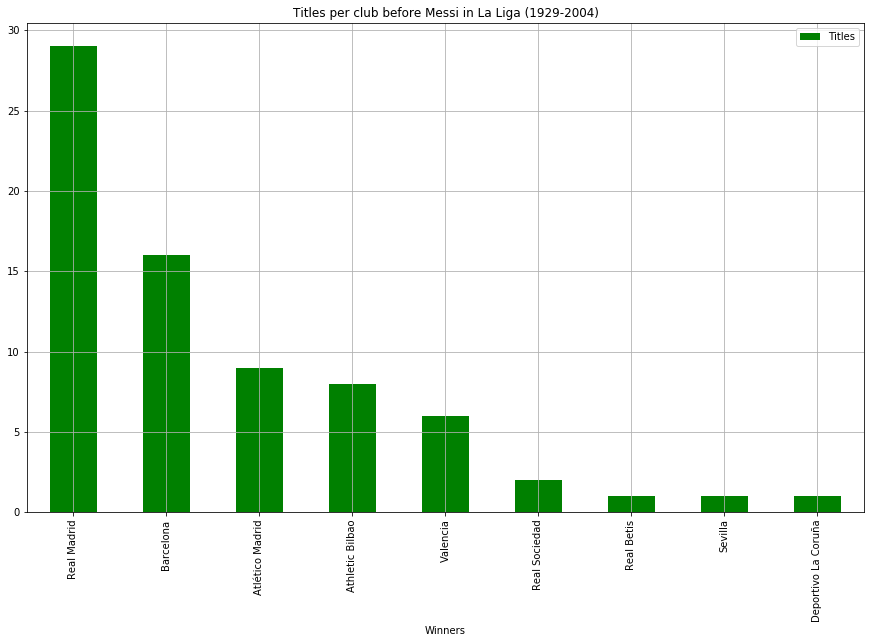

In [65]:
#Generamos gráficos de los dataframes de conteo:

liga_before_messi_plot = liga_count_before_messi_df.plot.bar(title = 'Titles per club before Messi in La Liga (1929-2004)', x='Winners', y='Titles',figsize=(15,9), color='green', grid=1)

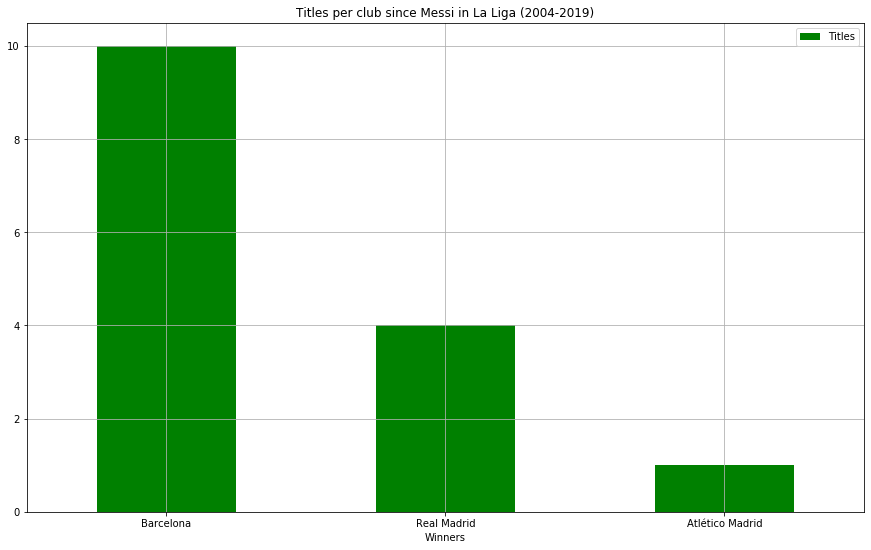

In [12]:
liga_with_messi_plot = liga_count_with_messi_df.plot.bar(title = 'Titles per club since Messi in La Liga (2004-2019)', x='Winners', y='Titles',figsize=(15,9), rot=0, color='green', grid=1)

In [13]:
#Calculamos los ratios de la liga antes de Messi y los guardamos en dos listas:

ratio_barcelona_liga_before_messi = liga_count_before_messi_df.iloc[1,1]/liga_count_before_messi_df['Titles'].sum()
ratio_ls_barcelona = ['Barcelona']
ratio_ls_barcelona.append(ratio_barcelona_liga_before_messi)
ratio_madrid_liga_before_messi = liga_count_before_messi_df.iloc[0,1]/liga_count_before_messi_df['Titles'].sum()
ratio_ls_madrid = ['Madrid']
ratio_ls_madrid.append(ratio_madrid_liga_before_messi)

In [14]:
#Calculamos los ratios de la liga con Messi y los guardamos en las dos listas:

ratio_barcelona_liga_with_messi = liga_count_with_messi_df.iloc[0,1]/liga_count_with_messi_df['Titles'].sum()
ratio_ls_barcelona.append(ratio_barcelona_liga_with_messi)
ratio_madrid_liga_with_messi = liga_count_with_messi_df.iloc[1,1]/liga_count_with_messi_df['Titles'].sum()
ratio_ls_madrid.append(ratio_madrid_liga_with_messi)

In [15]:
#Calculamos la diferencia de ratios de la liga y los guardamos en las dos listas:

ratio_ls_barcelona.append(ratio_barcelona_liga_with_messi-ratio_barcelona_liga_before_messi)
ratio_ls_madrid.append(ratio_madrid_liga_with_messi-ratio_madrid_liga_before_messi)

### Wikitable de La Copa del Rey

In [16]:
copa_ls = wikitable_scraping('https://en.wikipedia.org/wiki/Copa_del_Rey','wikitable sortable collapsible')

In [17]:
copa_ls

['1903',
 'Athletic Bilbao',
 '3–2',
 'Madrid FC',
 'Hipódromo',
 'Madrid',
 '1904',
 'Athletic Bilbao',
 'Not played',
 '[A]',
 'Español de Madrid',
 'Tiro del Pichón',
 'Madrid',
 '1905',
 'Madrid FC',
 '1–0',
 'Athletic Bilbao',
 'Tiro del Pichón',
 'Madrid',
 '1906',
 'Madrid FC',
 '4–1',
 'Athletic Bilbao',
 'Hipódromo',
 'Madrid',
 '1907',
 'Madrid FC',
 '1–0',
 'Bizcaya',
 'Hipódromo',
 'Madrid',
 '1908',
 'Madrid FC',
 '2–1',
 'Real Vigo Sporting',
 "O'Donnell",
 'Madrid',
 '1909',
 'Real Sociedad',
 '3–1',
 'Español de Madrid',
 "O'Donnell",
 'Madrid',
 '1910 FEF',
 'Barcelona',
 '3–2',
 'Español de Madrid',
 'Tiro del Pichón',
 'Madrid',
 '1910 UECF',
 'Athletic Bilbao',
 '1–0',
 'Real Sociedad',
 'Ondarreta',
 'San Sebastián',
 '1911',
 'Athletic Bilbao',
 '3–1',
 'Español',
 'Josaleta',
 'Getxo',
 '1912',
 'Barcelona',
 '2–0',
 'Gimnástica',
 'La Industria',
 'Barcelona',
 '1913 FEF',
 'Racing de Irún',
 '1–0',
 '[B]',
 'Athletic Bilbao',
 "O'Donnell",
 'Madrid',
 '1913 UEC

In [18]:
#Limpiamos la lista y generamos un dataframe:

filtr_ls = ['[A]','[B]','[C]','[D]','[E]','[F]','[G]','[H]','[I]','[J]','[K]','[L]']
copa_ls = [i for i in copa_ls if not i in filtr_ls]
copa_ls = copa_ls[0:703]
copa_ls.remove('Spanish Civil War')

copa_df = pd.DataFrame(np.array(copa_ls).reshape(117,6))
copa_df = copa_df[[0,1,3]]
copa_df.columns = ['Season','Winner','Runner_up']
copa_df = copa_df[copa_df.Season != '1910 UECF']
copa_df = copa_df[copa_df.Season != '1913 FEF']
copa_df = copa_df.replace({'Atlético Bilbao': 'Athletic Bilbao', True: False})
copa_df = copa_df.replace({'Madrid FC': 'Real Madrid', True: False})
copa_df = copa_df.replace({'Madrid': 'Real Madrid', True: False})
copa_df = copa_df.replace({'RCD Español': 'Espanyol', True: False})
copa_df = copa_df.replace({'Español': 'Espanyol', True: False})
copa_df.head()

,Season,Winner,Runner_up
0,1903,Athletic Bilbao,Real Madrid
1,1904,Athletic Bilbao,Español de Madrid
2,1905,Real Madrid,Athletic Bilbao
3,1906,Real Madrid,Athletic Bilbao
4,1907,Real Madrid,Bizcaya


In [19]:
#Separamos el dataframe en dos subsets a partir de los registros de 2004:

copa_before_messi_df = copa_df[:100]
copa_with_messi_df = copa_df[100:]

In [20]:
#Conteo antes de Messi:

copa_count_before_messi_df = copa_before_messi_df.Winner.value_counts().rename_axis('Winners').reset_index(name='Titles')
copa_count_before_messi_df

,Winners,Titles
0,Barcelona,24
1,Athletic Bilbao,22
2,Real Madrid,17
3,Atlético Madrid,9
4,Zaragoza,6
5,Valencia,6
6,Real Unión,3
7,Sevilla,3
8,Espanyol,3
9,Real Sociedad,2


In [21]:
#Conteo con Messi:

copa_count_with_messi_df = copa_with_messi_df.Winner.value_counts().rename_axis('Winners').reset_index(name='Titles')
copa_count_with_messi_df

,Winners,Titles
0,Barcelona,6
1,Sevilla,2
2,Valencia,2
3,Real Madrid,2
4,Atlético Madrid,1
5,Espanyol,1
6,Betis,1


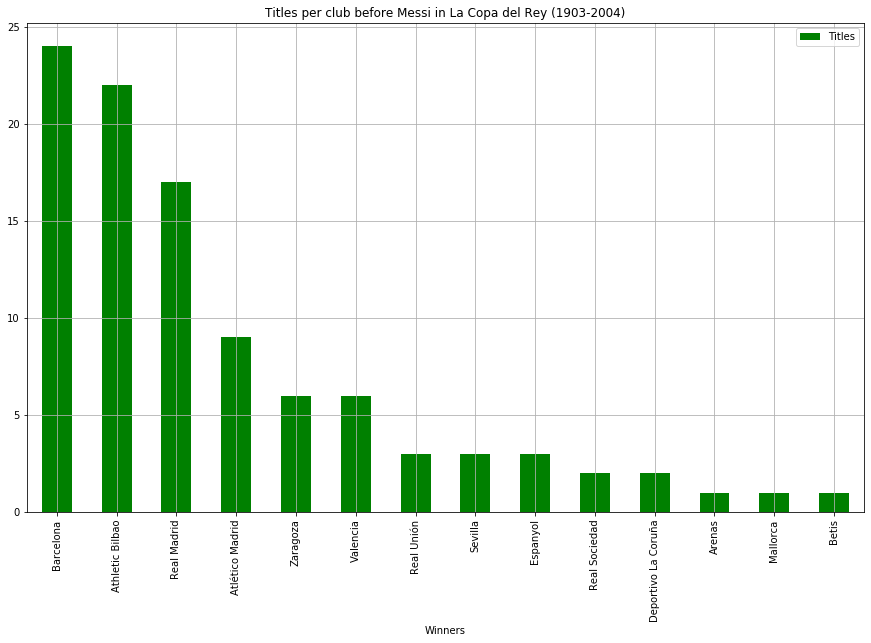

In [22]:
#Generamos gráficos de los dataframes de conteo:

copa_before_messi_plot = copa_count_before_messi_df.plot.bar(title = 'Titles per club before Messi in La Copa del Rey (1903-2004)', x='Winners', y='Titles',figsize=(15,9), color='green', grid=1)

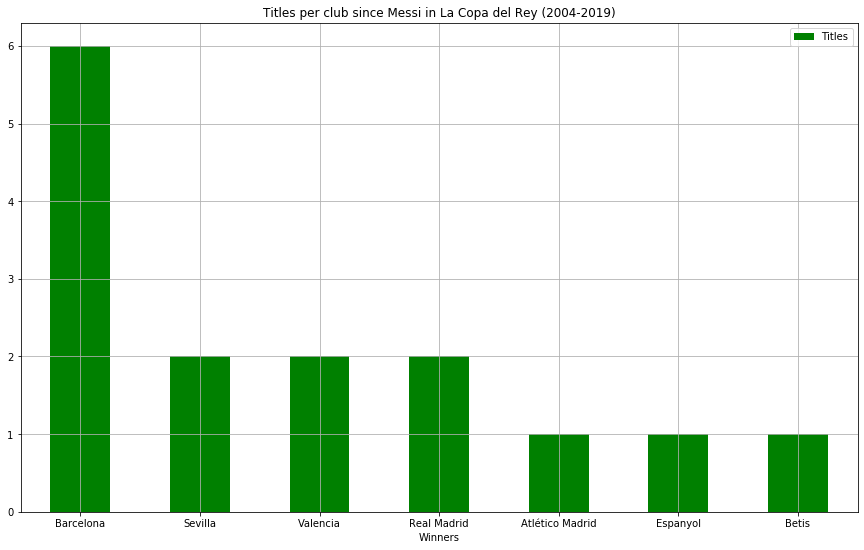

In [23]:
copa_with_messi_plot = copa_count_with_messi_df.plot.bar(title = 'Titles per club since Messi in La Copa del Rey (2004-2019)', x='Winners', y='Titles',figsize=(15,9), rot=0, color='green', grid=1)

In [24]:
#Calculamos los ratios de la copa antes de Messi y los guardamos en las dos listas:

ratio_barcelona_copa_before_messi = copa_count_before_messi_df.iloc[0,1]/copa_count_before_messi_df['Titles'].sum()
ratio_ls_barcelona.append(ratio_barcelona_copa_before_messi)
ratio_madrid_copa_before_messi = copa_count_before_messi_df.iloc[2,1]/copa_count_before_messi_df['Titles'].sum()
ratio_ls_madrid.append(ratio_madrid_copa_before_messi)

In [25]:
#Calculamos los ratios de la copa con Messi y los guardamos en las dos listas:
ratio_barcelona_copa_with_messi = copa_count_with_messi_df.iloc[0,1]/copa_count_with_messi_df['Titles'].sum()
ratio_ls_barcelona.append(ratio_barcelona_copa_with_messi)
ratio_madrid_copa_with_messi = copa_count_with_messi_df.iloc[3,1]/copa_count_with_messi_df['Titles'].sum()
ratio_ls_madrid.append(ratio_madrid_copa_with_messi)


In [26]:
#Calculamos la diferencia de ratios de la copa y los guardamos en las dos listas:
ratio_ls_barcelona.append(ratio_barcelona_copa_with_messi-ratio_barcelona_copa_before_messi)
ratio_ls_madrid.append(ratio_madrid_copa_with_messi-ratio_madrid_copa_before_messi)

### Wikitable de la Champions League

In [27]:
champions_ls = wikitable_scraping('https://en.wikipedia.org/wiki/List_of_European_Cup_and_UEFA_Champions_League_finals','wikitable plainrowheaders sortable')

In [28]:
champions_ls

['[11]',
 '1955–56',
 'ESP',
 'Real Madrid',
 '4–3',
 'FRA',
 'Reims',
 '',
 'Parc des Princes',
 'Paris',
 '1956–57',
 'ESP',
 'Real Madrid',
 '2–0',
 'ITA',
 'Fiorentina',
 '',
 'Santiago Bernabéu Stadium',
 'Madrid',
 '1957–58',
 'ESP',
 'Real Madrid',
 '3–2',
 'ITA',
 'Milan',
 '',
 'Heysel Stadium',
 'Brussels',
 '1958–59',
 'ESP',
 'Real Madrid',
 '2–0',
 'FRA',
 'Reims',
 '',
 'Neckarstadion',
 'Stuttgart',
 '1959–60',
 'ESP',
 'Real Madrid',
 '7–3',
 'FRG',
 'Eintracht Frankfurt',
 '',
 'Hampden Park',
 'Glasgow',
 '1960–61',
 'POR',
 'Benfica',
 '3–2',
 'ESP',
 'Barcelona',
 '',
 'Wankdorf Stadium',
 'Bern',
 '1961–62',
 'POR',
 'Benfica',
 '5–3',
 'ESP',
 'Real Madrid',
 '',
 'Olympisch Stadion',
 'Amsterdam',
 '1962–63',
 'ITA',
 'Milan',
 '2–1',
 'POR',
 'Benfica',
 '',
 'Wembley Stadium',
 'London',
 '1963–64',
 'ITA',
 'Internazionale',
 '3–1',
 'ESP',
 'Real Madrid',
 '',
 'Prater Stadium',
 'Vienna',
 '1964–65',
 'ITA',
 'Internazionale',
 '1–0',
 'POR',
 'Benfica',
 ''

In [29]:
#Limpiamos la lista y generamos un dataframe:

champions_ls = [i for i in champions_ls if not i in filtr_ls]
champions_ls.remove('[11]')
champions_ls = champions_ls[0:576]

champions_df = pd.DataFrame(np.array(champions_ls).reshape(64,9))
champions_df = champions_df[[0,2,5]]
champions_df.columns = ['Season','Winner','Runner_up']
champions_df.head()

,Season,Winner,Runner_up
0,1955–56,Real Madrid,Reims
1,1956–57,Real Madrid,Fiorentina
2,1957–58,Real Madrid,Milan
3,1958–59,Real Madrid,Reims
4,1959–60,Real Madrid,Eintracht Frankfurt


In [30]:
#Separamos el dataframe en dos subsets a partir de los registros de 2004:

champions_before_messi_df = champions_df[:49]
champions_with_messi_df = champions_df[49:]

In [31]:
#Conteo antes de Messi:

champions_count_before_messi_df = champions_before_messi_df.Winner.value_counts().rename_axis('Winners').reset_index(name='Titles')
champions_count_before_messi_df

,Winners,Titles
0,Real Madrid,9
1,Milan,6
2,Liverpool,4
3,Bayern Munich,4
4,Ajax,4
5,Nottingham Forest,2
6,Benfica,2
7,Porto,2
8,Internazionale,2
9,Juventus,2


In [32]:
#Conteo con Messi:

champions_count_with_messi_df = champions_with_messi_df.Winner.value_counts().rename_axis('Winners').reset_index(name='Titles')
champions_count_with_messi_df

,Winners,Titles
0,Barcelona,4
1,Real Madrid,4
2,Liverpool,2
3,Chelsea,1
4,Bayern Munich,1
5,Internazionale,1
6,Milan,1
7,Manchester United,1


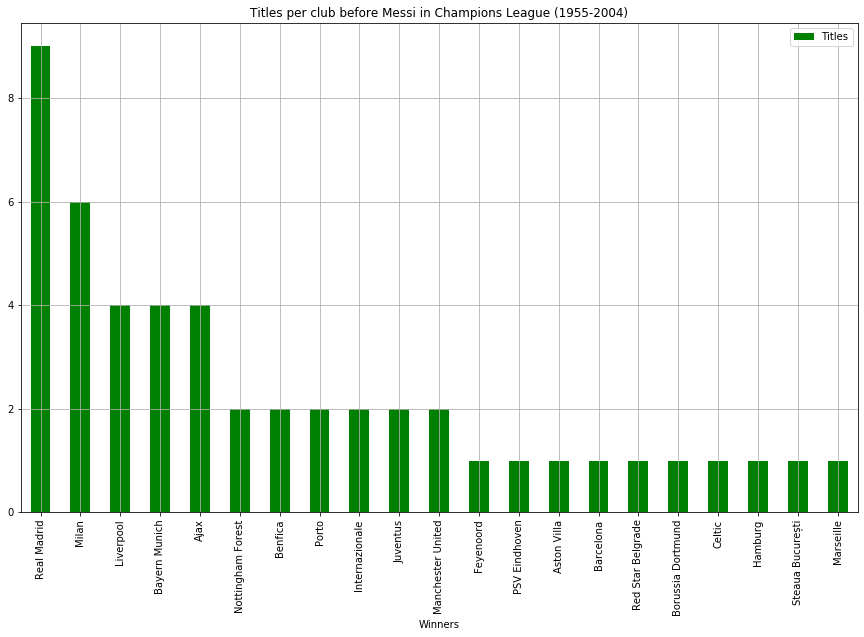

In [33]:
#Generamos gráficos de los dataframes de conteo:
champions_before_messi_plot = champions_count_before_messi_df.plot.bar(title = 'Titles per club before Messi in Champions League (1955-2004)', x='Winners', y='Titles',figsize=(15,9), color='green', grid=1)

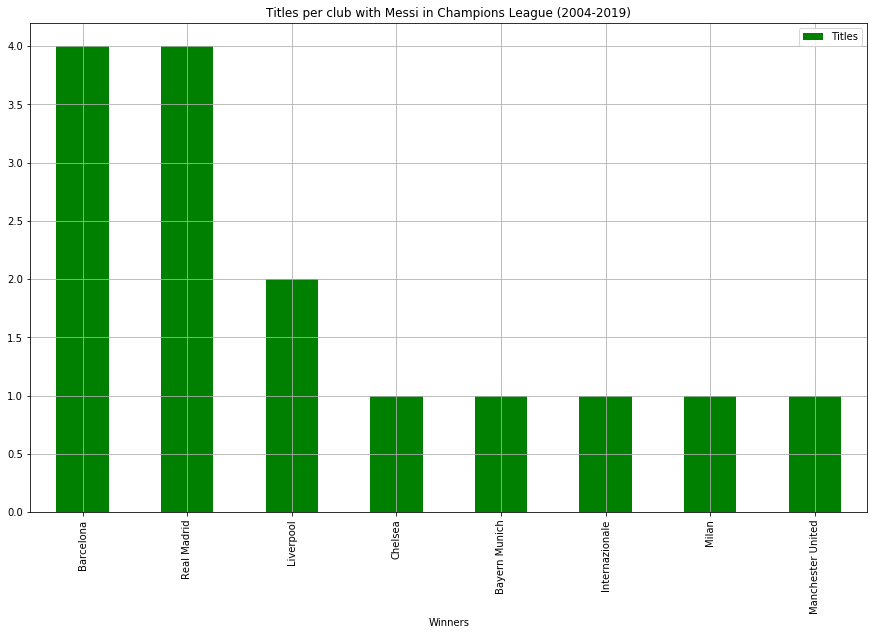

In [34]:
champions_with_messi_plot = champions_count_with_messi_df.plot.bar(title = 'Titles per club with Messi in Champions League (2004-2019)', x='Winners', y='Titles',figsize=(15,9), color='green', grid=1)

In [35]:
#Calculamos los ratios de la champions antes de Messi y los guardamos en las dos listas:
ratio_barcelona_champions_before_messi = champions_count_before_messi_df.iloc[18,1]/champions_count_before_messi_df['Titles'].sum()
ratio_ls_barcelona.append(ratio_barcelona_champions_before_messi)
ratio_madrid_champions_before_messi = champions_count_before_messi_df.iloc[0,1]/champions_count_before_messi_df['Titles'].sum()
ratio_ls_madrid.append(ratio_madrid_champions_before_messi)

In [36]:
#Calculamos los ratios de la champions con Messi y los guardamos en las dos listas:
ratio_barcelona_champions_with_messi = champions_count_with_messi_df.iloc[0,1]/champions_count_with_messi_df['Titles'].sum()
ratio_ls_barcelona.append(ratio_barcelona_champions_with_messi)
ratio_madrid_champions_with_messi = champions_count_with_messi_df.iloc[1,1]/champions_count_with_messi_df['Titles'].sum()
ratio_ls_madrid.append(ratio_madrid_champions_with_messi)


In [37]:
#Calculamos la diferencia de ratios de la champions y los guardamos en las dos listas:
ratio_ls_barcelona.append(ratio_barcelona_champions_with_messi-ratio_barcelona_champions_before_messi)
ratio_ls_madrid.append(ratio_madrid_champions_with_messi-ratio_madrid_champions_before_messi)

In [38]:
#Generamos un dataframe agregando todos los ratios calculados anteriormente:

ratios_ls = ratio_ls_barcelona + ratio_ls_madrid
ratios_df = pd.DataFrame(np.array(ratios_ls).reshape(2,10))
ratios_df.columns = ['Team','Liga before Messi', 'Liga with Messi', 'Liga improvement','Copa before Messi', 'Copa with Messi','Copa improvement', 'Champions before Messi', 'Champions with Messi', 'Champions improvement']
ratios_df

,Team,Liga before Messi,Liga with Messi,Liga improvement,Copa before Messi,Copa with Messi,Copa improvement,Champions before Messi,Champions with Messi,Champions improvement
0,Barcelona,0.2191780821917808,0.6666666666666666,0.4474885844748858,0.24,0.4,0.16000000000000003,0.02040816326530612,0.26666666666666666,0.24625850340136055
1,Madrid,0.3972602739726027,0.26666666666666666,-0.13059360730593605,0.17,0.13333333333333333,-0.03666666666666668,0.1836734693877551,0.26666666666666666,0.08299319727891155


In [39]:
#Exportamos el dataframe como archivo csv:

ratios_df.to_csv('WEB_ratios_df.csv', index = False)

## Conclusiones:
### Desde que Messi está en el Barça:
- El Barça ha ganado un 66,66% de las Ligas que ha disputado, antes de messi ganaba un 21,92% de las que disputaba.
    
- El Madrid ha ganado un 26,66% de las Ligas que ha disputado, antes de messi ganaba un 39,73% de las que disputaba.
    
- El Barça ha ganado un 40% de las Copas del Rey que ha disputado, antes de messi ganaba un 24,00% de las que disputaba.   
    
- El Madrid ha ganado un 13,33% de las Copas del Rey que ha disputado, antes de messi ganaba un 17,00% de las que disputaba.
    
- El Barça ha ganado un 26,66% de las Champions que ha disputado, antes de messi ganaba un 2,04% de las que disputaba.

- El Madrid ha ganado un 26,66% de las Champions que ha disputado, antes de messi ganaba un 18,37% de las que disputaba. 

# API PROJECT (PART 2)

In [40]:
#Definimos una función que nos devuelve un dataframe con el contenido de archivos json de la API: SWAPI(https://swapi.co) 
#Nos pide que le pasemos la url de la API y el número de páginas del archivo json.

def parsing_swapi_data(url, page_count):
    ls =[]
    for i in range(1,page_count):
        locator = url+str(i)
        response = requests.get(locator)
        result = response.json()
        data = json_normalize(result)
        flattened_data = json_normalize(data['results'][0])
        ls.append(flattened_data)
    df = pd.concat(ls, sort= False, ignore_index = True)
    return df

In [41]:
#Generamos un dataframe con información de los vehículos que aparecen en la saga de Star Wars:

vehicles_df = parsing_swapi_data('https://swapi.co/api/vehicles/?page=',5)


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[https://swapi.co/api/films/5/, https://swapi....",2014-12-10T15:36:25.724000Z,2014-12-22T18:21:15.523587Z,https://swapi.co/api/vehicles/4/
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[https://swapi.co/api/films/1/],2014-12-10T16:01:52.434000Z,2014-12-22T18:21:15.552614Z,https://swapi.co/api/vehicles/6/
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[https://swapi.co/api/films/1/],2014-12-10T16:13:52.586000Z,2014-12-22T18:21:15.583700Z,https://swapi.co/api/vehicles/7/
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,unknown,6.4,1200,1,0,65,2 days,starfighter,[],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-10T16:33:52.860000Z,2014-12-22T18:21:15.606149Z,https://swapi.co/api/vehicles/8/
4,Snowspeeder,t-47 airspeeder,Incom corporation,unknown,4.5,650,2,0,10,none,airspeeder,"[https://swapi.co/api/people/1/, https://swapi...",[https://swapi.co/api/films/2/],2014-12-15T12:22:12Z,2014-12-22T18:21:15.623033Z,https://swapi.co/api/vehicles/14/
5,TIE bomber,TIE/sa bomber,Sienar Fleet Systems,unknown,7.8,850,1,0,none,2 days,space/planetary bomber,[],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T12:33:15.838000Z,2014-12-22T18:21:15.667730Z,https://swapi.co/api/vehicles/16/
6,AT-AT,All Terrain Armored Transport,"Kuat Drive Yards, Imperial Department of Milit...",unknown,20,60,5,40,1000,unknown,assault walker,[],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T12:38:25.937000Z,2014-12-22T18:21:15.714673Z,https://swapi.co/api/vehicles/18/
7,AT-ST,All Terrain Scout Transport,"Kuat Drive Yards, Imperial Department of Milit...",unknown,2,90,2,0,200,none,walker,[https://swapi.co/api/people/13/],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T12:46:42.384000Z,2014-12-22T18:21:15.761584Z,https://swapi.co/api/vehicles/19/
8,Storm IV Twin-Pod cloud car,Storm IV Twin-Pod,Bespin Motors,75000,7,1500,2,0,10,1 day,repulsorcraft,[],[https://swapi.co/api/films/2/],2014-12-15T12:58:50.530000Z,2014-12-22T18:21:15.783232Z,https://swapi.co/api/vehicles/20/
9,Sail barge,Modified Luxury Sail Barge,Ubrikkian Industries Custom Vehicle Division,285000,30,100,26,500,2000000,Live food tanks,sail barge,[],[https://swapi.co/api/films/3/],2014-12-18T10:44:14.217000Z,2014-12-22T18:21:15.807906Z,https://swapi.co/api/vehicles/24/


In [42]:
#Limpiamos el dataframe:

cols_to_drop = ['pilots', 'films', 'created', 'edited', 'url']
vehicles_df = vehicles_df.drop(cols_to_drop, axis=1)
vehicles_df = vehicles_df.rename(columns={'vehicle_class':'transportation_class'})

In [62]:
vehicles_df = vehicles_df.replace('unknown', np.nan)
vehicles_df['crew'] =  pd.to_numeric(vehicles_df['crew'])
vehicles_df = vehicles_df.replace('unknown', np.nan)
vehicles_df['crew'] = vehicles_df['crew'].replace(0, 1)
vehicles_df['passengers'] = pd.to_numeric(vehicles_df['passengers'])
vehicles_df['passengers'] = vehicles_df['passengers'].replace(0, 1)
vehicles_df.head(40)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,transportation_class,ratio
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30.0,50000,2 months,wheeled,0.652174
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1.0,50,0,repulsorcraft,1.000000
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1.0,5,NaN,repulsorcraft,1.000000
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,NaN,6.4,1200,1,1.0,65,2 days,starfighter,1.000000
4,Snowspeeder,t-47 airspeeder,Incom corporation,NaN,4.5,650,2,1.0,10,none,airspeeder,0.500000
5,TIE bomber,TIE/sa bomber,Sienar Fleet Systems,NaN,7.8,850,1,1.0,none,2 days,space/planetary bomber,1.000000
6,AT-AT,All Terrain Armored Transport,"Kuat Drive Yards, Imperial Department of Milit...",NaN,20,60,5,40.0,1000,NaN,assault walker,8.000000
7,AT-ST,All Terrain Scout Transport,"Kuat Drive Yards, Imperial Department of Milit...",NaN,2,90,2,1.0,200,none,walker,0.500000
8,Storm IV Twin-Pod cloud car,Storm IV Twin-Pod,Bespin Motors,75000,7,1500,2,1.0,10,1 day,repulsorcraft,0.500000
9,Sail barge,Modified Luxury Sail Barge,Ubrikkian Industries Custom Vehicle Division,285000,30,100,26,500.0,2000000,Live food tanks,sail barge,19.230769


In [44]:
#Generamos un dataframe con información de los starships que aparecen en la saga de Star Wars:

starships_df = parsing_swapi_data('https://swapi.co/api/starships/?page=',5)


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards",1143350000,19000,n/a,279144,38000,250000000,6 years,2.0,40,Star dreadnought,[],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T12:31:42.547000Z,2017-04-19T10:56:06.685592Z,https://swapi.co/api/starships/15/
1,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.co/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-22T17:35:44.431407Z,https://swapi.co/api/starships/5/
2,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,342953,843342,1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.co/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-22T17:35:44.452589Z,https://swapi.co/api/starships/9/
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.co/api/people/13/, https://swap...","[https://swapi.co/api/films/2/, https://swapi....",2014-12-10T16:59:45.094000Z,2014-12-22T17:35:44.464156Z,https://swapi.co/api/starships/10/
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,134999,14,1000km,2,0,110,1 week,1.0,80,assault starfighter,[],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-12T11:00:39.817000Z,2014-12-22T17:35:44.479706Z,https://swapi.co/api/starships/11/
5,X-wing,T-65 X-wing,Incom Corporation,149999,12.5,1050,1,0,110,1 week,1.0,100,Starfighter,"[https://swapi.co/api/people/1/, https://swapi...","[https://swapi.co/api/films/2/, https://swapi....",2014-12-12T11:19:05.340000Z,2014-12-22T17:35:44.491233Z,https://swapi.co/api/starships/12/
6,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,unknown,9.2,1200,1,0,150,5 days,1.0,105,Starfighter,[https://swapi.co/api/people/4/],[https://swapi.co/api/films/1/],2014-12-12T11:21:32.991000Z,2014-12-22T17:35:44.549047Z,https://swapi.co/api/starships/13/
7,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,unknown,21.5,1000,1,6,70000,1 month,3.0,70,Patrol craft,[https://swapi.co/api/people/22/],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T13:00:56.332000Z,2014-12-22T17:35:44.716273Z,https://swapi.co/api/starships/21/
8,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,240000,20,850,6,20,80000,2 months,1.0,50,Armed government transport,"[https://swapi.co/api/people/1/, https://swapi...","[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T13:04:47.235000Z,2014-12-22T17:35:44.795405Z,https://swapi.co/api/starships/22/
9,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8500000,300,800,854,75,6000000,2 years,2.0,40,Escort ship,[],"[https://swapi.co/api/films/2/, https://swapi....",2014-12-15T13:06:30.813000Z,2014-12-22T17:35:44.848329Z,https://swapi.co/api/starships/23/


In [45]:
#Limpiamos el dataframe:
starships_df = starships_df.drop(cols_to_drop, axis=1)
starships_df = starships_df.drop(['hyperdrive_rating','MGLT'], axis=1)
starships_df = starships_df.rename(columns={'starship_class':'transportation_class'})

In [46]:
starships_df = starships_df.replace('unknown', np.nan)
starships_df['crew'] =  pd.to_numeric(starships_df['crew'])
starships_df = starships_df.replace('unknown', np.nan)
starships_df['crew'] = starships_df['crew'].replace(0, 1)
starships_df['passengers'] = pd.to_numeric(starships_df['passengers'])
starships_df['passengers'] = starships_df['passengers'].replace(0, 1)
starships_df.head(40)

In [47]:
#Calculamos el ratio de pasajeros-tripulación para vehículos y starships:

vehicles_df['ratio'] = vehicles_df.apply(lambda row: row.passengers / row.crew, axis=1)
starships_df['ratio'] = starships_df.apply(lambda row: row.passengers / row.crew, axis=1)

In [50]:
vehicles_df['ratio'].mean()

3.1792503834837933

In [51]:
starships_df['ratio'].mean()

30.396172648649642

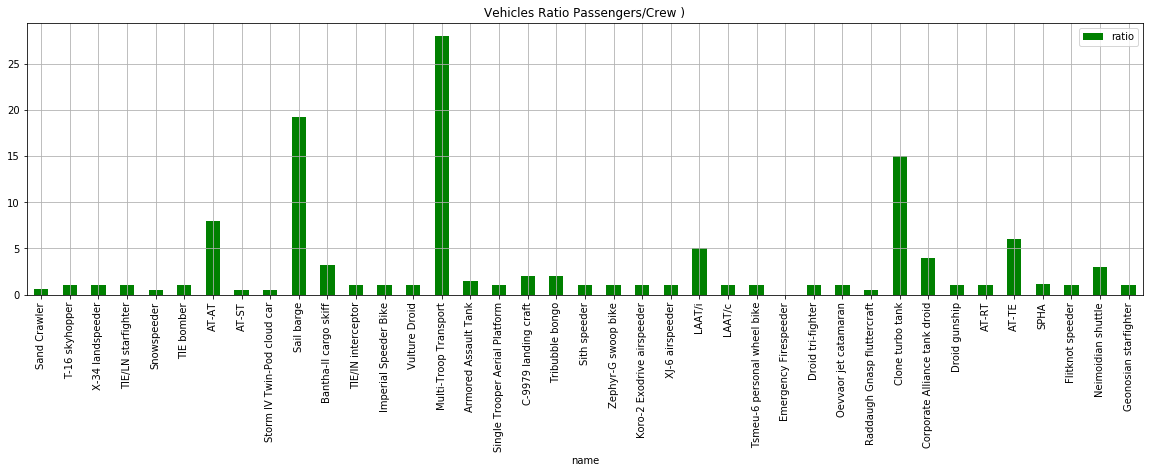

In [52]:
#Generamos los gráficos con el ratio pasajeros-tripulación:

vehicles_ratio_passangers_crew_plot = vehicles_df.plot.bar(title ='Vehicles Ratio Passengers/Crew )' , x='name', y='ratio',figsize=(20,5), color='green', grid=1)

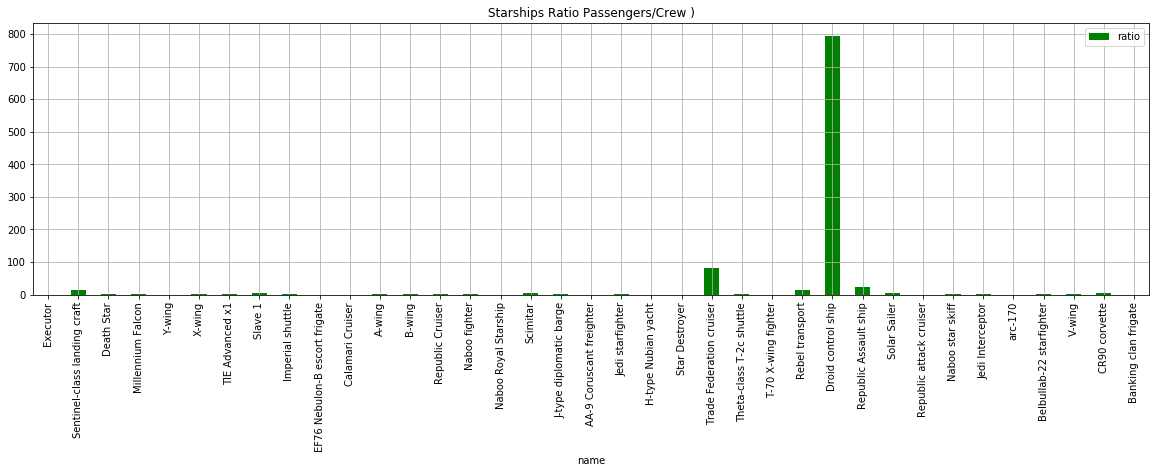

In [53]:
starships_ratio_passangers_crew_plot = starships_df.plot.bar(title ='Starships Ratio Passengers/Crew )' , x='name', y='ratio',figsize=(20,5), color='green', grid=1)

In [54]:
#Filtramos los dataframes quitando los outliers:

filtered_vehicles_df = vehicles_df[vehicles_df['ratio']<10]
filtered_starships_df = starships_df[starships_df['ratio']<100]

In [55]:
filtered_vehicles_df['ratio'].mean()


1.6737355811889976

In [56]:
filtered_starships_df['ratio'].mean()

5.754574531324972

In [61]:
ratio = filtered_starships_df['ratio'].mean() / filtered_vehicles_df['ratio'].mean()
ratio

3.438162273659144

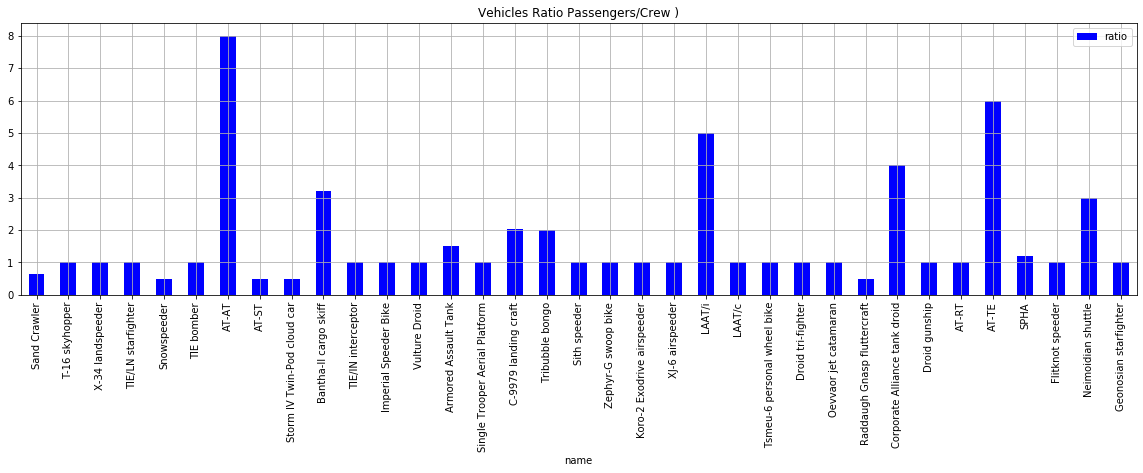

In [57]:
#Generamos los gráficos con el ratio pasajeros-tripulación sin outliers:

vehicles_ratio_passangers_crew_plot = filtered_vehicles_df.plot.bar(title ='Vehicles Ratio Passengers/Crew )' , x='name', y='ratio',figsize=(20,5), color='blue', grid=1)

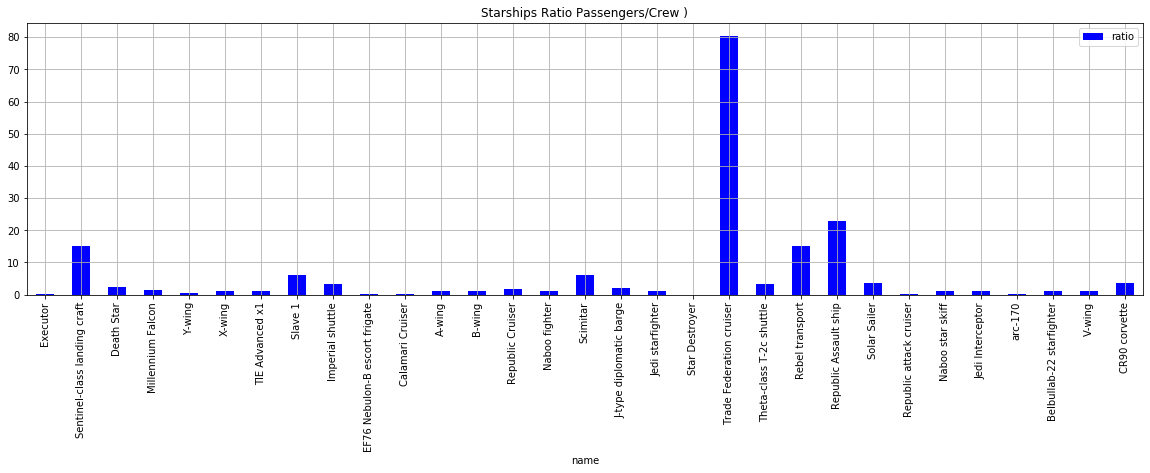

In [58]:
starships_ratio_passangers_crew_plot = filtered_starships_df.plot.bar(title ='Starships Ratio Passengers/Crew )' , x='name', y='ratio',figsize=(20,5), color='blue', grid=1)

In [64]:
#Agregamos las dos tablas en un solo dataframe y exportamos el archivo como csv:

sw_transports_df = pd.concat([starships_df, vehicles_df], ignore_index=True)
sw_transports_df.to_csv('API_sw_transports.csv', index = False)

## Conclusiones:
 - Confirmamos la hipótesis inicial, un transporte del tipo "starship" tiene un ratio pasajero/tripulación mayor que el de un transporte "vehículo", dicho de otro modo: en el tipo starship es necesaria menos tripulación para transportar el mismo número de pasajeros que en el tipo vehículo.
 - Para el tipo starship el ratio es: 1 miembro de la tripulación por cada 5.75 pasajeros.
 - Para el tipo vehículo el ratio es: 1 miembro de la tripulación por cada 1.67 pasajeros.
 - Para transportar una cantidad (x) de pasajeros son necesarios 1(x) miembros de la tripulación en un starship y 3.43(x) en un vehículo.
 